In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [4]:
ingresos = pd.read_csv(r"Data Sets/1.Ingresos.csv",encoding='latin-1',sep=";",decimal=",")

In [4]:
ingresos.head(2)

,Anio,Trimestre,Ingresos Internet (miles de pesos),Ingresos telefonos moviles (miles de pesos),Ingresos TV por suscripcion,Ingresos TV satelital,Periodo,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2023.0,4.0,167376015.0,515335794.0,133582201.0,64748819.0,Octubre - Diciembre,NaN,NaN,NaN,NaN,NaN
1,2023.0,3.0,133106593.0,380119973.0,103738033.0,51179480.0,Julio - Septiembre,NaN,NaN,NaN,NaN,NaN


In [5]:
del ingresos["Unnamed: 7"]
del ingresos["Unnamed: 8"]
del ingresos["Unnamed: 9"]
del ingresos["Unnamed: 10"]
del ingresos["Unnamed: 11"]


In [6]:
ingresos = ingresos.rename(columns={'Ingresos Internet (miles de pesos)': 'Ingresos_Internet'})
ingresos = ingresos.rename(columns={'Ingresos telefonos moviles (miles de pesos)': 'Ingresos_telefonia_movil'})
ingresos = ingresos.rename(columns={'Ingresos TV satelital':'Ingresos_TV_satelital'})
ingresos = ingresos.rename(columns={'Ingresos TV por suscripcion':'Ingresos_TV_suscripcion'})

In [7]:
ingresos.head(2)

,Anio,Trimestre,Ingresos_Internet,Ingresos_telefonia_movil,Ingresos_TV_suscripcion,Ingresos_TV_satelital,Periodo
0,2023.0,4.0,167376015.0,515335794.0,133582201.0,64748819.0,Octubre - Diciembre
1,2023.0,3.0,133106593.0,380119973.0,103738033.0,51179480.0,Julio - Septiembre


In [8]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Anio                      20 non-null     float64
 1   Trimestre                 20 non-null     float64
 2   Ingresos_Internet         20 non-null     float64
 3   Ingresos_telefonia_movil  20 non-null     float64
 4   Ingresos_TV_suscripcion   20 non-null     float64
 5   Ingresos_TV_satelital     20 non-null     float64
 6    Periodo                  20 non-null     object 
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [9]:
ingresos['Anio'] = ingresos['Anio'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)
ingresos['Trimestre'] = ingresos['Trimestre'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

In [10]:
ingresos['Anio'] = ingresos['Anio'].astype(int)
ingresos['Trimestre'] = ingresos['Trimestre'].astype(int)

In [11]:

colum_ingresos = ["Ingresos_Internet","Ingresos_telefonia_movil","Ingresos_TV_suscripcion","Ingresos_TV_satelital"]
años_ingresos = ingresos.groupby('Anio')[colum_ingresos].sum().reset_index()


In [16]:
años_ingresos = años_ingresos[años_ingresos['Anio'] != 0]

In [17]:
años_ingresos 

,Anio,Ingresos_Internet,Ingresos_telefonia_movil,Ingresos_TV_suscripcion,Ingresos_TV_satelital
1,2019,86772531.0,2.318802e+08,78941879.0,41800884.0
2,2020,127585840.0,3.087300e+08,101477729.0,52310313.0
3,2021,163383869.0,4.430359e+08,140270929.0,72154388.0
4,2022,252169081.0,6.800771e+08,203268298.0,101621889.0
5,2023,522677881.0,1.460351e+09,399074954.0,187984186.0


In [18]:
 
ingresos_anuales = pd.DataFrame(años_ingresos)

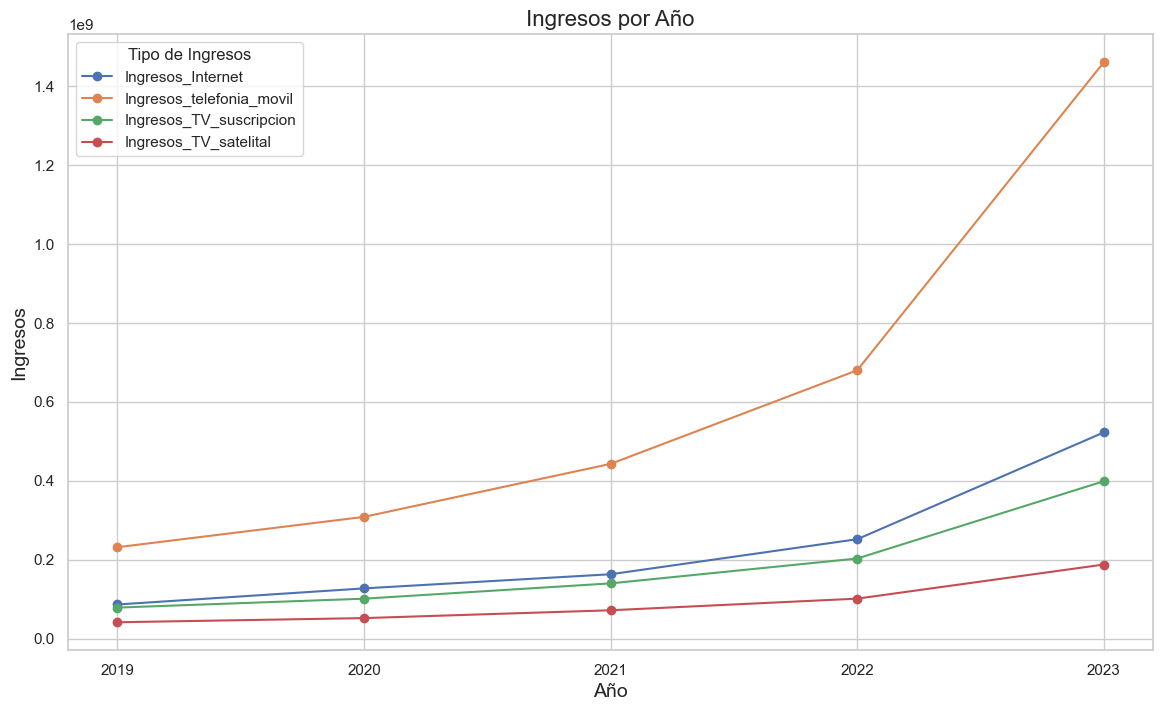

In [19]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

for col in colum_ingresos:
    plt.plot(ingresos_anuales['Anio'],ingresos_anuales[col], marker='o', label=col)

plt.title('Ingresos por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Ingresos', fontsize=14)
plt.legend(title='Tipo de Ingresos')
plt.xticks(ingresos_anuales['Anio'])  # Asegura que solo aparezcan los años deseados
plt.grid(True)
plt.show()

# INGRESOS 
Iniciamos nuestro analisis exploratorio generando una grafica de tendencia de los ingresos generados en los ultimos 5 años de los principales servicios de telecomunicaciones que utilizan el internet como base.

- Los ingresos por servicios de Internet muestran un crecimiento constante y significativo año tras año. Este crecimiento se acelera especialmente a partir de 2022, con un aumento notable en 2023.

- La telefonía móvil genera los mayores ingresos entre los servicios analizados. Los ingresos casi se duplican cada año, destacándose un crecimiento exponencial, especialmente a partir de 2021.

- Los ingresos por TV por suscripción y satelital también aumentan significativamente cada año. Aunque el crecimiento es notable, no es tan acelerado como el de la telefonía móvil.

## Conclusiones
Se presenta una mayor adopción y dependencia de los servicios de telefonia movil e internet. 

La telefonía móvil es el principal generador de ingresos, y su crecimiento exponencial sugiere que seguirá siendo el líder en ingresos en el futuro cercano.

En este análisis superficial del sector de las telecomunicaciones podemos ir concluyendo que las empresas deben generar mayores inversiones de capital en los servicios de telefonía móvil e Internet para capitalizar el crecimiento exponencial de las dos industrias.




In [5]:
Servicios_moviles = pd.read_csv(r"Data Sets/2.Servicios telefonia movil.csv",encoding='latin-1',sep=";",decimal=",")

In [21]:
Servicios_moviles.head(4)

,Anio,Trimestre,Numero_SMS_salientes,Llamadas_Salientes,Minutos_Salientes(miles),Accesos_Operativos,Periodo
0,2019,1,2979265948,7560513,20364355,58606442,Enero - Marzo
1,2019,2,2827445823,7713769,20160651,57596091,Abril - Junio
2,2019,3,2949922014,7254864,20264083,56275726,Julio - Septiembre
3,2019,4,2175994230,7601121,18396067,55930914,Octubre - Diciembre


In [22]:
Servicios_moviles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Anio                      20 non-null     int64 
 1   Trimestre                 20 non-null     int64 
 2   Numero_SMS_salientes      20 non-null     int64 
 3   Llamadas_Salientes        20 non-null     int64 
 4   Minutos_Salientes(miles)  20 non-null     int64 
 5   Accesos_Operativos        20 non-null     int64 
 6   Periodo                   20 non-null     object
dtypes: int64(6), object(1)
memory usage: 1.2+ KB


In [23]:
colum_serv_moviles = ["Numero_SMS_salientes","Llamadas_Salientes","Minutos_Salientes(miles)","Accesos_Operativos"]
Serv_moviles = Servicios_moviles.groupby('Anio')[colum_serv_moviles].sum().reset_index()

In [24]:
Serv_moviles.head(5)

,Anio,Numero_SMS_salientes,Llamadas_Salientes,Minutos_Salientes(miles),Accesos_Operativos
0,2019,10932628015,30130267,79185156,228409173
1,2020,6949369970,24882952,80932854,191565442
2,2021,3848799963,22509249,74678907,230206931
3,2022,3275893016,21155698,64200372,237242900
4,2023,2577190656,17377882,56337762,245074405


In [25]:
# Normalizar los datos
scaler = MinMaxScaler()
df_normalized = Serv_moviles.copy()
df_normalized[['Numero_SMS_salientes', 'Llamadas_Salientes', 'Minutos_Salientes(miles)', 'Accesos_Operativos']] = scaler.fit_transform(Serv_moviles[['Numero_SMS_salientes', 'Llamadas_Salientes', 'Minutos_Salientes(miles)', 'Accesos_Operativos']])

In [26]:
df_normalized

,Anio,Numero_SMS_salientes,Llamadas_Salientes,Minutos_Salientes(miles),Accesos_Operativos
0,2019,1.000000,1.000000,0.928941,0.688553
1,2020,0.523274,0.588523,1.000000,0.000000
2,2021,0.152189,0.402385,0.745724,0.722150
3,2022,0.083622,0.296244,0.319682,0.853641
4,2023,0.000000,0.000000,0.000000,1.000000


In [27]:
df_normalized.describe()

,Anio,Numero_SMS_salientes,Llamadas_Salientes,Minutos_Salientes(miles),Accesos_Operativos
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2021.000000,0.351817,0.457430,0.598869,0.652869
std,1.581139,0.413852,0.370749,0.426617,0.385072
min,2019.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,0.083622,0.296244,0.319682,0.688553
50%,2021.000000,0.152189,0.402385,0.745724,0.722150
75%,2022.000000,0.523274,0.588523,0.928941,0.853641
max,2023.000000,1.000000,1.000000,1.000000,1.000000


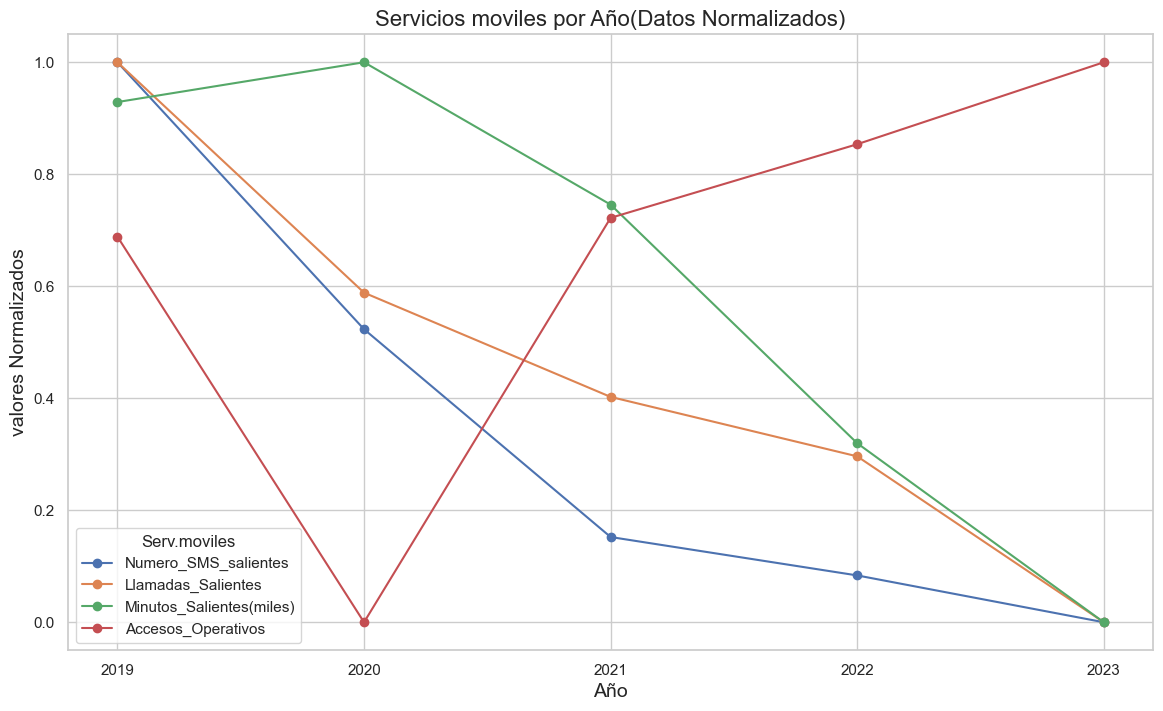

In [28]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Graficar los datos normalizados
for col in colum_serv_moviles:
    plt.plot(df_normalized['Anio'], df_normalized[col], marker='o', label=col)

# Añadir título, etiquetas y leyenda
plt.title('Servicios moviles por Año(Datos Normalizados)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('valores Normalizados', fontsize=14)
plt.legend(title='Serv.moviles')
plt.xticks(df_normalized['Anio'])
plt.grid(True)
plt.show()

# Telefonia Movil

Debido a los resutados de la primera grafica en donde pudimos observar que la telefonia movil genera la mayor cantidad de ingresos del sector de las telecomunicaciones con lo cual podemos inferir que se presenta una mayor adopcion y dependencia a este servicio. Quisimos introducirnos dentro de esta 
para indentificar los serivicios que se prestan dentro de los paquetes de telefonia movil.

## SMS
A lo largo de los años, hay una disminución constante y abismal en el uso de los mensajes, es probable que esto se de debido al auge de aplicaciones de mensajería instantánea como WhatsApp y Telegram.

## llamadas 
las llamadas salientes también muestran una disminución año tras año. lo cual se puede llegar a presentar por el posibleme incremento en el uso de llamadas por Internet (VoIP). 

## Minutos 
 Asi como las llamadas, el uso de minutos viene en una caida gradual año tras año.

 ## Accesos Operativos 

Al contrario de los demas servicios, los accesos operativos muestran una tendencia de aumento año a año. Esto sugiere un incremento en el número de dispositivos conectados o suscriptores activos en la red de telefonía móvil, lo cual podría ser indicativo del crecimiento en el uso de datos móviles y dispositivos conectados.

Tambien podemos inferir que dentro de los paquetes de telefonia movil el uso de datos moviles es el servicio clave para las personas a la hora de decidir volverse o no suscriptores activos de la red de telefonia movil

## Conclusion 
El incremento en accesos operativos indica que, aunque los métodos tradicionales de comunicación están disminuyendo, el número de usuarios o dispositivos conectados a la red sigue aumentando. Esto podría estar relacionado con el aumento en el uso de servicios de datos y el crecimiento de dispositivos conectados.

 Este cambio podría impulsar a las empresas a enfocarse más en la expansión de la capacidad de datos y mejorar la infraestructura de red para soportar el creciente uso de servicios de Internet móvil.

In [6]:
Accesos_Internet = pd.read_csv(r"Data Sets/3.Accesos por tipo de tecnologia internet.csv",encoding='latin-1',sep=";",decimal=",")

In [30]:
Accesos_Internet.head(2)

,Anio,Trimestre,ADSL,Cablemodem,Fibra_optica,Wireless,Otros,Total,Periodo,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,2023.0,4.0,836390.0,6022532.0,3908183.0,585760.0,194796.0,11547661.0,Octubre - Diciembre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.0,3.0,897895.0,6018832.0,3708718.0,581436.0,200027.0,11406908.0,Julio - Septiembre,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
del Accesos_Internet["Unnamed: 9"]
del Accesos_Internet["Unnamed: 10"]
del Accesos_Internet["Unnamed: 11"]
del Accesos_Internet["Unnamed: 12"]
del Accesos_Internet["Unnamed: 13"]
del Accesos_Internet["Unnamed: 14"]
del Accesos_Internet["Unnamed: 15"]
del Accesos_Internet["Unnamed: 16"]
del Accesos_Internet["Unnamed: 17"]
del Accesos_Internet["Unnamed: 18"]
del Accesos_Internet["Unnamed: 19"]
del Accesos_Internet["Unnamed: 20"]
del Accesos_Internet["Unnamed: 21"]

In [32]:
Accesos_Internet.isin([0, '']).sum()

Anio            0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra_optica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

In [33]:
Accesos_Internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Anio          24 non-null     float64
 1   Trimestre     24 non-null     float64
 2   ADSL          24 non-null     float64
 3   Cablemodem    24 non-null     float64
 4   Fibra_optica  24 non-null     float64
 5   Wireless      24 non-null     float64
 6   Otros         24 non-null     float64
 7   Total         24 non-null     float64
 8   Periodo       24 non-null     object 
dtypes: float64(8), object(1)
memory usage: 2.0+ KB


In [34]:
Accesos = ["ADSL","Cablemodem","Fibra_optica","Wireless","Otros"]
Accesos_años = Accesos_Internet.groupby('Anio')[Accesos].sum().reset_index()

In [35]:
Accesos_años

,Anio,ADSL,Cablemodem,Fibra_optica,Wireless,Otros
0,2018.0,13981984.0,16571272.0,1079124.0,870047.0,465760.0
1,2019.0,11447626.0,18754974.0,3191409.0,1262831.0,909341.0
2,2020.0,9072828.0,20539964.0,4636620.0,1563813.0,958018.0
3,2021.0,7802044.0,22877010.0,6473506.0,1927038.0,1006793.0
4,2022.0,5712223.0,24122067.0,10874934.0,2232136.0,940575.0
5,2023.0,3945211.0,24041095.0,14324300.0,2325666.0,812089.0


In [36]:
Accesos_años['Anio'] = Accesos_años['Anio'].astype(int)

In [37]:
# Normalizar los datos
scaler = MinMaxScaler()
df_normalized_2 = Accesos_años.copy()
df_normalized_2 [['ADSL', 'Cablemodem', 'Fibra_optica', 'Wireless',"Otros"]] = scaler.fit_transform(Accesos_años[['ADSL', 'Cablemodem', 'Fibra_optica', 'Wireless',"Otros"]])

In [38]:
df_normalized_2

,Anio,ADSL,Cablemodem,Fibra_optica,Wireless,Otros
0,2018,1.000000,0.000000,0.000000,0.000000,0.000000
1,2019,0.747493,0.289202,0.159476,0.269840,0.819878
2,2020,0.510883,0.525599,0.268588,0.476612,0.909848
3,2021,0.384270,0.835109,0.407271,0.726145,1.000000
4,2022,0.176054,1.000000,0.739576,0.935746,0.877608
5,2023,0.000000,0.989276,1.000000,1.000000,0.640125


In [39]:
df_normalized_2.describe()

,Anio,ADSL,Cablemodem,Fibra_optica,Wireless,Otros
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2020.500000,0.469783,0.606531,0.429152,0.568057,0.707910
std,1.870829,0.367213,0.407109,0.375603,0.391598,0.366923
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.250000,0.228108,0.348301,0.186754,0.321533,0.685064
50%,2020.500000,0.447577,0.680354,0.337930,0.601379,0.848743
75%,2021.750000,0.688340,0.950735,0.656500,0.883346,0.901788
max,2023.000000,1.000000,1.000000,1.000000,1.000000,1.000000


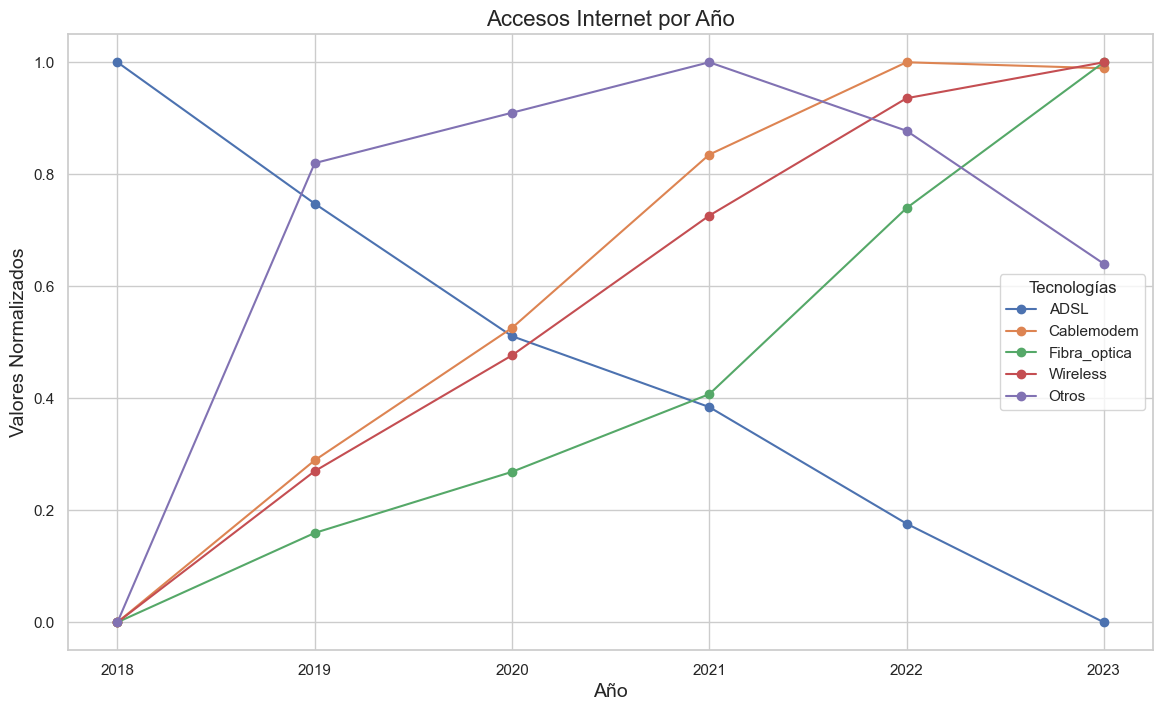

In [40]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Graficar los datos
for col in Accesos:
    plt.plot(df_normalized_2['Anio'], df_normalized_2[col], marker='o', label=col)

# Añadir título, etiquetas y leyenda
plt.title('Accesos Internet por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Valores Normalizados', fontsize=14)
plt.legend(title='Tecnologías')
plt.xticks(df_normalized_2['Anio'])
plt.grid(True)
plt.show()

# Internet

Ahora bien ya sabemos que los planes de datos y el internet en general como servicio, es la "punta de lanza" de las telecomunicaciones en Argentina. 

Con la siguiente grafica queremos identificar las distintas modalidades de acceso a internet que existen para conectarse a diferentes dispositivos y su comportamiento durante los ultimos años. 


- La modalidad de acceso ADSL viene en un notable descenso siendo utilizada cada vez menos como forma de conectarse. 

- Mientras que la fibra optica y el Wireless vienen en un  ascenso año tras año con lo cual podemos inferir que estas dos modalidades se han venido incrementando en su uso por la tendencia que existe a tener conexiones de alta velocidad y mayor capacidad (redes 3G, 4G y 5G).

- Aunque tambien se ha incrementado el uso del cablemodem año tras año, vemos un ligero descenso en el año 2023 siendo superado tanto por la fibra optica y el Wireless. Sin embargo sigue siendo una de las principales tecnologias de conexión. 

# Conclusiones 
 la evolución de las tecnologías de conexión a Internet muestra una clara preferencia por soluciones más rápidas y flexibles, con un marcado declive en el uso de tecnologías más antiguas como ADSL.

In [7]:
Penetracion_internet= pd.read_csv(r"Data Sets/4.Penetracion Total Internet.csv",encoding='latin-1',sep=";",decimal=",")

In [42]:
Penetracion_internet.head(3)

,Anio,Trimestre,Accesos_100_hogares,Accesos_100_hab,Periodo,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2023.0,4.0,78.56,24.66,Octubre - Diciembre,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.0,3.0,77.84,24.41,Julio - Septiembre,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023.0,2.0,77.02,24.14,Abril - Junio,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
del Penetracion_internet["Unnamed: 5"]
del Penetracion_internet["Unnamed: 6"]
del Penetracion_internet["Unnamed: 7"]
del Penetracion_internet["Unnamed: 8"]
del Penetracion_internet["Unnamed: 9"]
del Penetracion_internet["Unnamed: 10"]
del Penetracion_internet["Unnamed: 11"]

In [44]:
Penetracion_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Anio                 40 non-null     float64
 1   Trimestre            40 non-null     float64
 2   Accesos_100_hogares  40 non-null     float64
 3   Accesos_100_hab      40 non-null     float64
 4   Periodo              40 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.7+ KB


In [45]:
Penetracion_internet['Anio'] = Penetracion_internet['Anio'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)
Penetracion_internet['Trimestre'] = Penetracion_internet['Trimestre'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

In [46]:
Penetracion_internet['Anio'] = Penetracion_internet['Anio'].astype(int)

In [47]:
Hogares = ['Accesos_100_hogares']
Hogares_mean = Penetracion_internet.groupby('Anio')[Hogares].mean().reset_index()

In [48]:
Hogares_mean

,Anio,Accesos_100_hogares
0,0,NaN
1,2014,50.1450
2,2015,52.0525
3,2016,53.2150
4,2017,55.9350
5,2018,60.0225
6,2019,63.9300
7,2020,65.2500
8,2021,70.2375
9,2022,75.9250


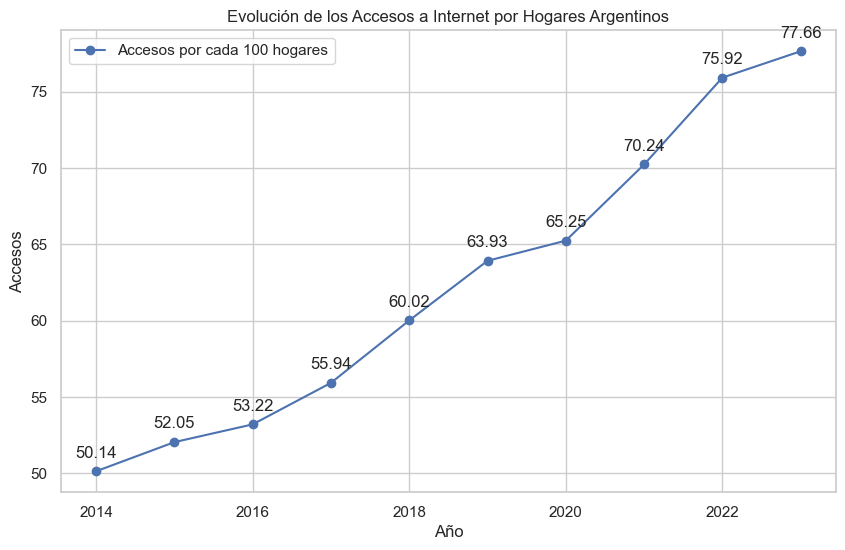

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(Hogares_mean['Anio'], Hogares_mean['Accesos_100_hogares'], marker='o', label='Accesos por cada 100 hogares')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.title('Evolución de los Accesos a Internet por Hogares Argentinos')
plt.legend()

# Añadir anotaciones para cada punto
for i in range(len(Hogares_mean)):
    plt.annotate(f'{Hogares_mean["Accesos_100_hogares"][i]:.2f}', 
                 (Hogares_mean['Anio'][i], Hogares_mean['Accesos_100_hogares'][i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.show()

Una vez identificadas las formas de acceso a internet y la adopcion que se ha venido presentando con las conexiones de fibra optica y Wireless dado su velocidad y capacidad por parte de la poblacion Argentina. 

Queremos empezar a identificar el comportamiento que se ha venido presentando en la acogida del servicio de internet o datos moviles por parte de la poblacion/ hogares de la Argentina

# Acceso a Internet por parte de los hogares argentinos

- Con la siguiente grafica visualizamos el crecimiento del servicio de internet año tras año. Cada vez mas existen hogares argentinos con el servicio de internet. En 2014, había aproximadamente 50 accesos por cada 100 hogares, y para 2023, este número ha aumentado a cerca de 78 accesos.

- El incremento anual es bastante consistente, con una tasa de crecimiento promedio de alrededor de 2.5 accesos adicionales por año.

- A partir de 2020, hay una aceleración notable en el crecimiento, especialmente entre 2020 y 2021, donde los accesos aumentaron en casi 5 puntos.

## Aumento en la Penetración de Internet:

La penetración de Internet ha mostrado un aumento constante y significativo en los últimos años, reflejando una mejor accesibilidad y disponibilidad de servicios de Internet para la población.

In [50]:
personas = ['Accesos_100_hab']
personas_mean = Penetracion_internet.groupby('Anio')[personas].mean().reset_index()

In [51]:
personas_mean 

,Anio,Accesos_100_hab
0,0,NaN
1,2014,15.2575
2,2015,15.9175
3,2016,16.3325
4,2017,17.2050
5,2018,18.5150
6,2019,19.7800
7,2020,20.2500
8,2021,21.8675
9,2022,23.7175


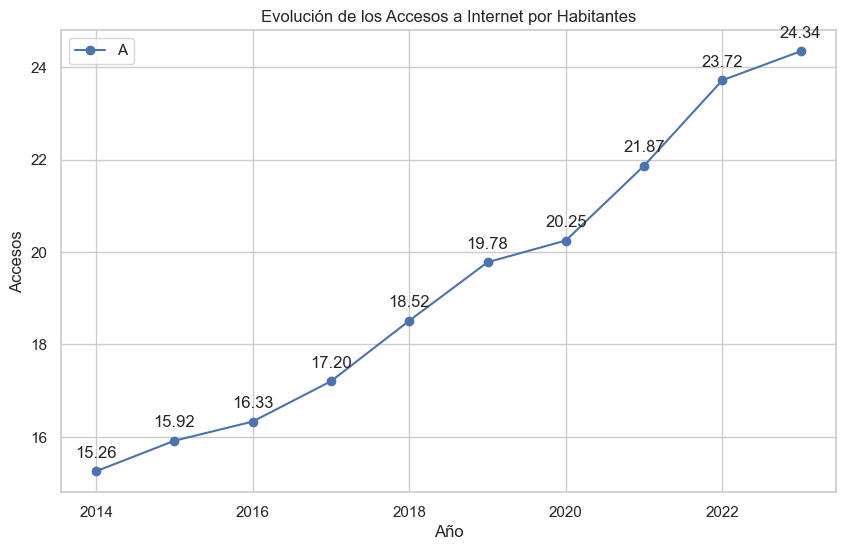

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(personas_mean['Anio'], personas_mean['Accesos_100_hab'], marker='o', label='Accesos por cada 100 hogares')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.title('Evolución de los Accesos a Internet por Habitantes')
plt.legend("A")

# Añadir anotaciones para cada punto
for i in range(len(personas_mean)):
    plt.annotate(f'{personas_mean["Accesos_100_hab"][i]:.2f}', 
                 (personas_mean['Anio'][i], personas_mean['Accesos_100_hab'][i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.show()

Con respecto a la poblacion Argentina en general, tambien se nota un incremento año a año  en el uso del servicio de internet , para el año 2023 de cada 100 argentinos 24 tienen coneccion a internet con diferentes dispositivos

- A partir de 2020, hay una aceleración notable en el crecimiento, especialmente entre 2020 y 2021, donde los accesos aumentaron en aproximadamente 1.6 puntos.

## Aumento en la Penetración de Internet:

La penetración de Internet ha mostrado un aumento constante y significativo en los últimos años, reflejando una mejor accesibilidad y disponibilidad de servicios de Internet para la población general.

## Conclusion 

- Comparacion 
Aunque el crecimiento en accesos por cada 100 habitantes es notable, es menos pronunciado en comparación con el crecimiento de accesos por cada 100 hogares.

Esto sugiere que la penetración en hogares puede estar ocurriendo a un ritmo más rápido, posiblemente debido a la mayor importancia de la conectividad en el hogar para múltiples dispositivos y usuarios. La empresa como tal deberia enfocarse en un mayor procentaje en prestar los servicios de internet en los hogares

In [8]:
Penetracion_telefonia_movil= pd.read_csv(r"Data Sets/5.Penetracion telefonia movil Total.csv",encoding='latin-1',sep=";",decimal=",")

In [54]:
Penetracion_telefonia_movil.head(5)

,Anio,Trimestre,Telefonia_Movial_(Accesos_100_hab),Periodo
0,2013,1,154,Enero - Marzo
1,2013,2,156,Abril - Junio
2,2013,3,159,Julio - Septiembre
3,2013,4,159,Octubre - Diciembre
4,2014,1,148,Enero - Marzo


In [55]:
Penetracion_telefonia_movil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Anio                                44 non-null     int64 
 1   Trimestre                           44 non-null     int64 
 2   Telefonia_Movial_(Accesos_100_hab)  44 non-null     int64 
 3   Periodo                             44 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.5+ KB


In [56]:
Telefonia_movil = ['Telefonia_Movial_(Accesos_100_hab)']
Telefonia_movil_mean = Penetracion_telefonia_movil.groupby('Anio')[Telefonia_movil].mean().reset_index()

In [57]:
Telefonia_movil_mean

,Anio,Telefonia_Movial_(Accesos_100_hab)
0,2013,157.00
1,2014,144.25
2,2015,140.75
3,2016,144.25
4,2017,142.00
5,2018,133.50
6,2019,128.50
7,2020,121.50
8,2021,125.50
9,2022,128.25


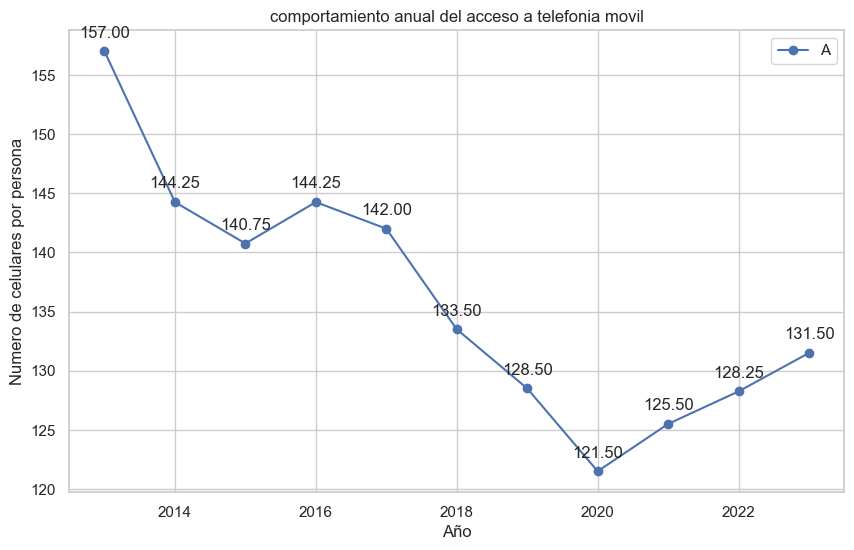

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(Telefonia_movil_mean['Anio'], Telefonia_movil_mean['Telefonia_Movial_(Accesos_100_hab)'], marker='o', label='Accesos por cada 100 hogares')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Numero de celulares por persona')
plt.title('comportamiento anual del acceso a telefonia movil')
plt.legend("Acceso_cada_100_habitantes")

# Añadir anotaciones para cada punto
for i in range(len(Telefonia_movil_mean)):
    plt.annotate(f'{Telefonia_movil_mean["Telefonia_Movial_(Accesos_100_hab)"][i]:.2f}', 
                 (Telefonia_movil_mean['Anio'][i], Telefonia_movil_mean['Telefonia_Movial_(Accesos_100_hab)'][i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.show()

# Telefonia Movil 

- Desde 2020 hasta 2023, los accesos han mostrado una tendencia al alza, recuperándose parcialmente después de la caída observada en años anteriores.

- La reducción de accesos podría estar relacionada con la evolución de la tecnología y el cambio en las preferencias de los usuarios, como el aumento del uso de servicios de Internet móvil y la disminución del uso de múltiples líneas por persona.

- Además, el cambio a servicios de datos y aplicaciones de mensajería puede haber reducido la necesidad de múltiples líneas de telefonía móvil.

In [9]:
Poblacion = pd.read_csv(r"Data Sets/6.Poblacion Argentina por Provincia.csv",encoding='latin-1',sep=";",decimal=",")

In [60]:
Poblacion.head(2)

,ID,PROVINCIAS,POBLACION,HOGARES,ACCESOS,Penetracion_cada_100_hab,Penetracion_cada_100_hogares
0,1,Buenos Aires,14911542,5970702,5011620,27.68,80.96
1,2,Capital Federal,2890151,1391258,1474367,47.80,117.02


In [61]:
Poblacion.dropna()
Poblacion.sort_values(by='POBLACION', ascending=False)

,ID,PROVINCIAS,POBLACION,HOGARES,ACCESOS,Penetracion_cada_100_hab,Penetracion_cada_100_hogares
0,1,Buenos Aires,14911542,5970702,5011620,27.68,80.96
5,6,Cordoba,3139606,1378237,1079302,27.76,90.67
20,22,Santa Fe,3055611,1273460,909501,25.08,79.75
1,2,Capital Federal,2890151,1391258,1474367,47.80,117.02
12,14,Mendoza,1654993,639467,299351,14.55,52.15
23,25,Tucuman,1210114,493794,266335,15.12,61.04
7,8,Entre Rios,1119919,494473,298637,20.91,69.94
16,18,Salta,1117163,404504,204732,13.80,56.98
3,4,Chaco,927414,368728,147386,11.85,44.35
6,7,Corrientes,857994,370958,159472,13.84,52.56


In [62]:
Poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            24 non-null     int64  
 1   PROVINCIAS                    24 non-null     object 
 2   POBLACION                     24 non-null     int64  
 3   HOGARES                       24 non-null     int64  
 4   ACCESOS                       24 non-null     int64  
 5   Penetracion_cada_100_hab      24 non-null     float64
 6   Penetracion_cada_100_hogares  24 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.4+ KB


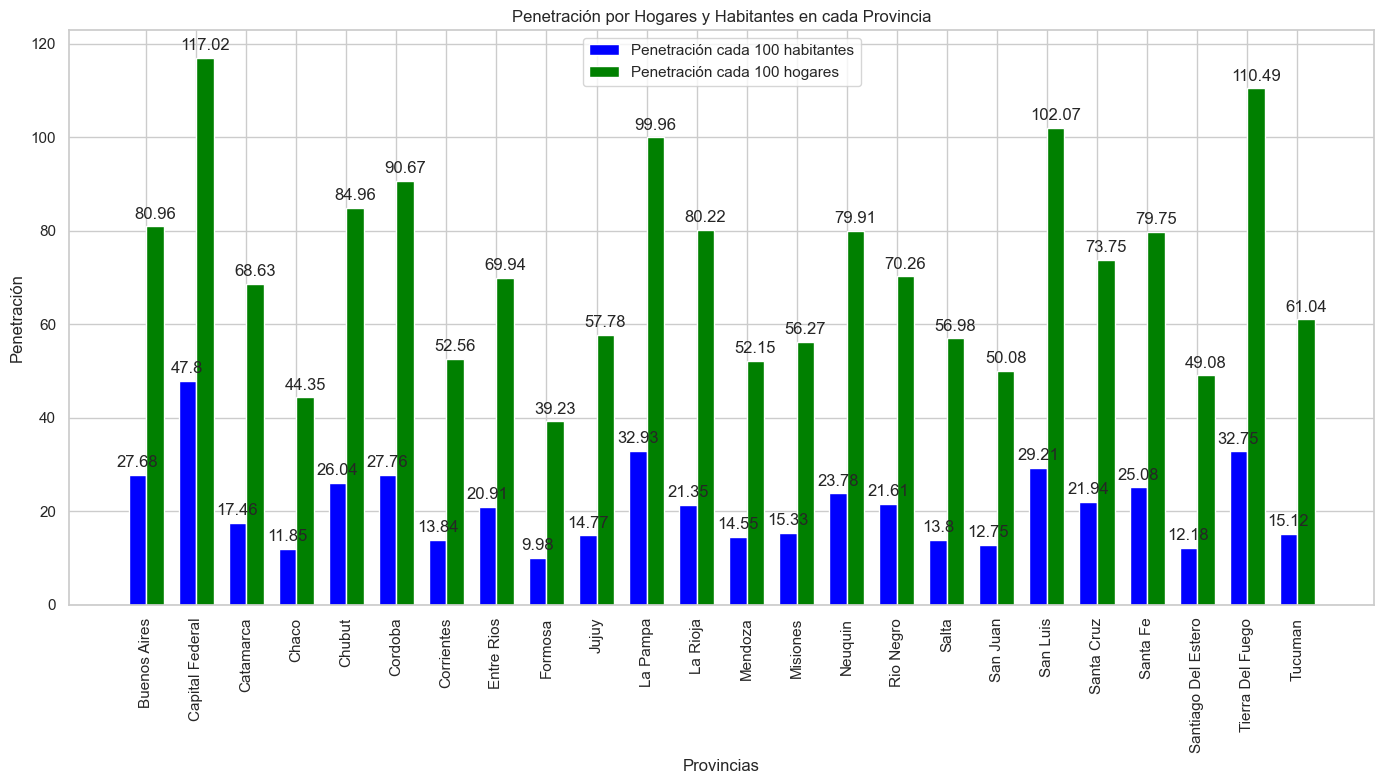

In [63]:
Poblacion['PROVINCIAS'] = Poblacion['PROVINCIAS'].astype(str)
bar_width = 0.35
index = np.arange(len(Poblacion['PROVINCIAS']))

fig, ax = plt.subplots(figsize=(14, 8))

# Barras para Penetracion_cada_100_hab
bar1 = ax.bar(index, Poblacion['Penetracion_cada_100_hab'], bar_width, label='Penetración cada 100 habitantes', color='blue')

# Barras para Penetracion_cada_100_hogares
bar2 = ax.bar(index + bar_width, Poblacion['Penetracion_cada_100_hogares'], bar_width, label='Penetración cada 100 hogares', color='green')

# Añadir etiquetas y título
ax.set_xlabel('Provincias')
ax.set_ylabel('Penetración')
ax.set_title('Penetración por Hogares y Habitantes en cada Provincia')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(Poblacion['PROVINCIAS'], rotation=90)
ax.legend()

# Mostrar valores sobre las barras
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Siguiendo con nustro analisis bajamos un escalon de profundidad para conocer la penetracion del servicio de internet por hogares y habitantes en las diferentes provincias de la Argentina. 

# Capital Federal:

Presenta la mayor penetración tanto por cada 100 habitantes (47.80) como por cada 100 hogares (117.02).
Esto indica una alta tasa de conectividad en comparación con otras provincias.

# Buenos Aires y Córdoba:

Buenos Aires tiene una penetración de 27.68 por cada 100 habitantes y 80.96 por cada 100 hogares.
Córdoba tiene una penetración similar de 27.76 por cada 100 habitantes, pero una penetración más alta de 90.67 por cada 100 hogares.
Ambas provincias muestran una buena tasa de conectividad, aunque Córdoba destaca en la penetración por hogares

# Provincias con Penetración Baja:

Formosa (9.98 por cada 100 habitantes y 39.23 por cada 100 hogares) y Chaco (11.85 por cada 100 habitantes y 44.35 por cada 100 hogares) tienen las tasas más bajas de penetración.
Estas provincias podrían ser objetivos importantes para estrategias de expansión de conectividad.

# Provincias Intermedias:

Provincias como Neuquén (23.78 por cada 100 habitantes y 79.91 por cada 100 hogares) y Santa Cruz (21.94 por cada 100 habitantes y 73.75 por cada 100 hogares) muestran tasas de penetración moderadas.
Aunque no están en la cima, todavía tienen una conectividad significativa.

# Comparación entre Penetración por Habitantes y Hogares:

En general, la penetración por cada 100 hogares es significativamente mayor que la penetración por cada 100 habitantes.
Esto sugiere que, aunque el acceso a internet es común en los hogares, no todos los individuos dentro de esas provincias pueden tener acceso individualmente.

## Conclusiones
- Las provincias más grandes y urbanizadas tienden a tener una mejor penetración, mientras que las más rurales o menos desarrolladas tienen una menor tasa de conectividad.
-  Las provincias con menor penetración pueden ser áreas clave para el crecimiento y la expansión de servicios de internet. O la empresa se puede centrar en las provincias de con alta tasa de conectividad y pelear por una participacion mas grande del mercado. 

- La alta penetración por cada 100 hogares sugiere que el acceso a internet es más común en los hogares que a nivel individual, lo que podría deberse a varios factores, incluyendo la capacidad económica y la infraestructura disponible.



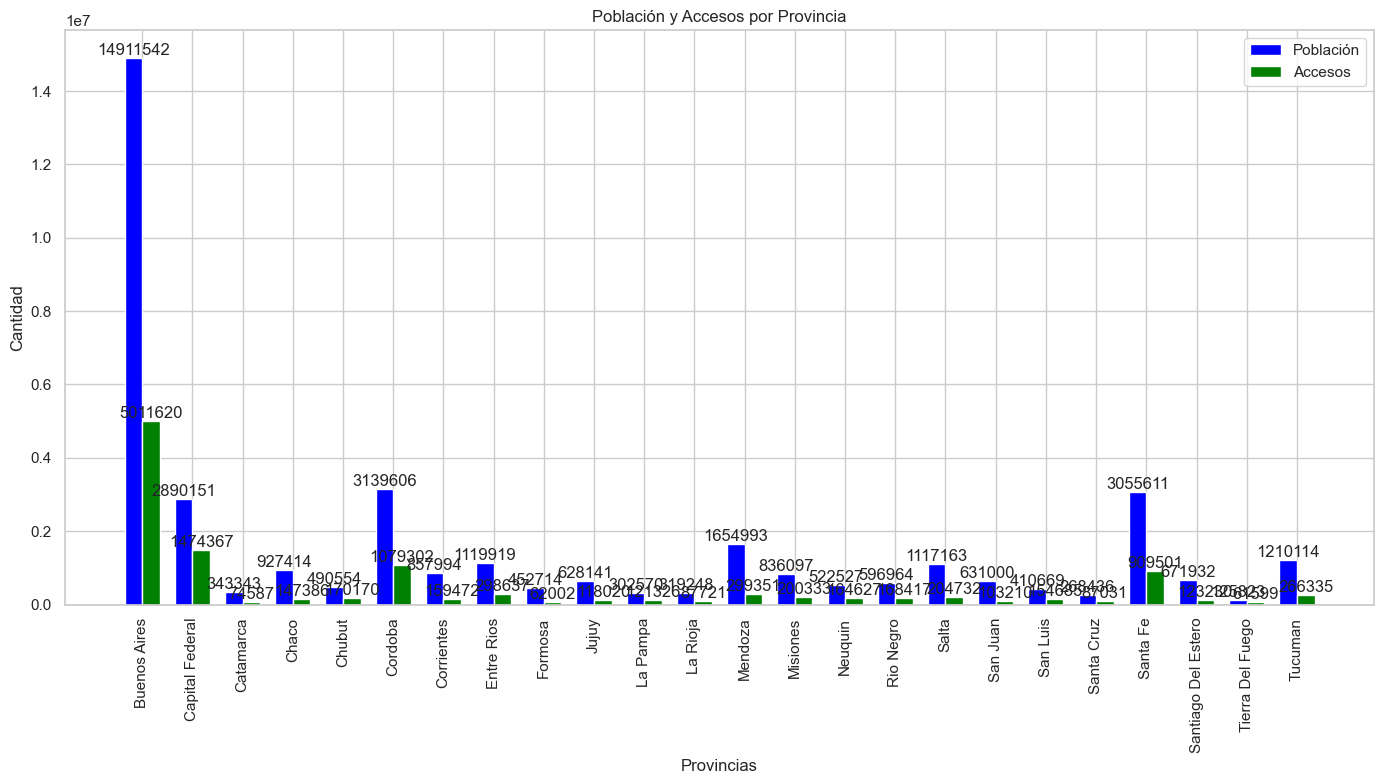

In [64]:
Poblacion['PROVINCIAS'] = Poblacion['PROVINCIAS'].astype(str)
bar_width = 0.35
index = np.arange(len(Poblacion['PROVINCIAS']))

fig, ax = plt.subplots(figsize=(14, 8))

# Barras para Población
bar1 = ax.bar(index, Poblacion['POBLACION'], bar_width, label='Población', color='blue')

# Barras para Accesos
bar2 = ax.bar(index + bar_width, Poblacion['ACCESOS'], bar_width, label='Accesos', color='green')

# Añadir etiquetas y título
ax.set_xlabel('Provincias')
ax.set_ylabel('Cantidad')
ax.set_title('Población y Accesos por Provincia')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(Poblacion['PROVINCIAS'], rotation=90)
ax.legend()

# Mostrar valores sobre las barras
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Poblacion y Accesos
- Capital Federal:

Tiene una población relativamente alta (2,890,151) pero destaca significativamente en accesos (1,474,367).
La alta proporción de accesos respecto a la población indica una fuerte conectividad en la provincia.

- Buenos Aires:

La provincia más poblada (14,911,542) y también presenta un gran número de accesos (5,011,620).
Sin embargo, la proporción de accesos respecto a la población no es tan alta como en Capital Federal, sugiriendo una necesidad de mayor inversión en infraestructura de internet.

- Cordoba y Santa Fe:

Córdoba (3,139,606 de población y 1,079,302 accesos) y Santa Fe (3,055,611 de población y 909,501 accesos) muestran una buena cantidad de accesos en relación a su población.
Ambas provincias tienen un equilibrio razonable entre población y accesos, lo cual es positivo para la conectividad regional.

- Provincias con Menor Conectividad:

Provincias como Formosa (452,714 de población y 62,002 accesos) y Chaco (927,414 de población y 147,386 accesos) presentan una notable brecha entre la población y los accesos.
Estas provincias tienen una conectividad mucho más baja y pueden beneficiarse de políticas de desarrollo de infraestructura de internet.

- Provincias Intermedias:

Provincias como Mendoza (1,654,993 de población y 299,351 accesos) y Tucumán (1,210,114 de población y 266,335 accesos) están en un rango intermedio.
Aunque no tienen la mayor cantidad de accesos, muestran una conectividad considerable en relación a su población.

# Conclusiones 

La comparación de las barras de población con las de accesos revela una tendencia en la que las provincias más urbanizadas y densamente pobladas tienden a tener un mayor número de accesos, lo cual es lógico debido a la mejor infraestructura y mayor demanda.

Accesos por Provincia:

La disparidad en accesos entre provincias como Buenos Aires y Capital Federal frente a Formosa y Chaco destaca la necesidad de políticas que busquen equilibrar la distribución de la infraestructura de internet a nivel nacional.

Las provincias con baja proporción de accesos en relación a su población pueden ser objetivos clave para futuras inversiones en infraestructura de internet.

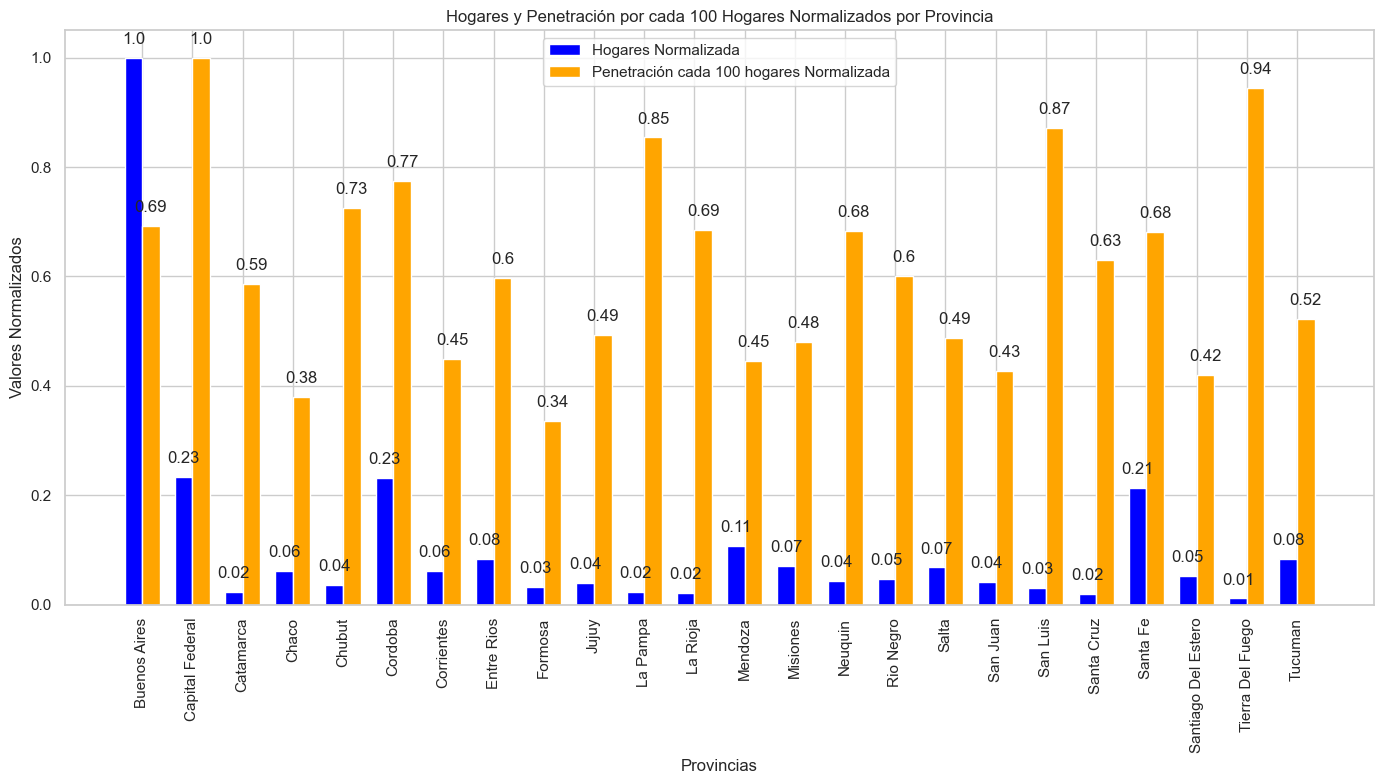

In [65]:
Poblacion['PROVINCIAS'] = Poblacion['PROVINCIAS'].astype(str)
Poblacion['HOGARES_NORM'] = Poblacion['HOGARES'] / Poblacion['HOGARES'].max()
Poblacion['Penetracion_cada_100_hogares_NORM'] = Poblacion['Penetracion_cada_100_hogares'] / Poblacion['Penetracion_cada_100_hogares'].max()

# Crear un gráfico de barras agrupadas para Población y Penetración cada 100 habitantes normalizados
bar_width = 0.35
index = np.arange(len(Poblacion['PROVINCIAS']))

fig, ax = plt.subplots(figsize=(14, 8))

# Barras para Población normalizada
bar1 = ax.bar(index, Poblacion['HOGARES_NORM'], bar_width, label='Hogares Normalizada', color='blue')

# Barras para Penetración cada 100 habitantes normalizada
bar2 = ax.bar(index + bar_width, Poblacion['Penetracion_cada_100_hogares_NORM'], bar_width, label='Penetración cada 100 hogares Normalizada', color='orange')

# Añadir etiquetas y título
ax.set_xlabel('Provincias')
ax.set_ylabel('Valores Normalizados')
ax.set_title('Hogares y Penetración por cada 100 Hogares Normalizados por Provincia')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(Poblacion['PROVINCIAS'], rotation=90)
ax.legend()

# Mostrar valores sobre las barras
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Hogares y Penetracion cada 100 hogares 
## Conclusiones 

- Existe una notable disparidad en la conectividad a internet entre las diferentes provincias. Algunas provincias, a pesar de tener menos hogares, muestran una alta penetración, mientras que otras con más hogares tienen una penetración relativamente baja.

-  Las provincias con baja penetración normalizada necesitan políticas de desarrollo e inversión en infraestructura de internet para mejorar la conectividad.

- Provincias como Capital Federal y Buenos Aires destacan por su infraestructura de internet, mientras que otras como Formosa y Chaco necesitan mejoras significativas.

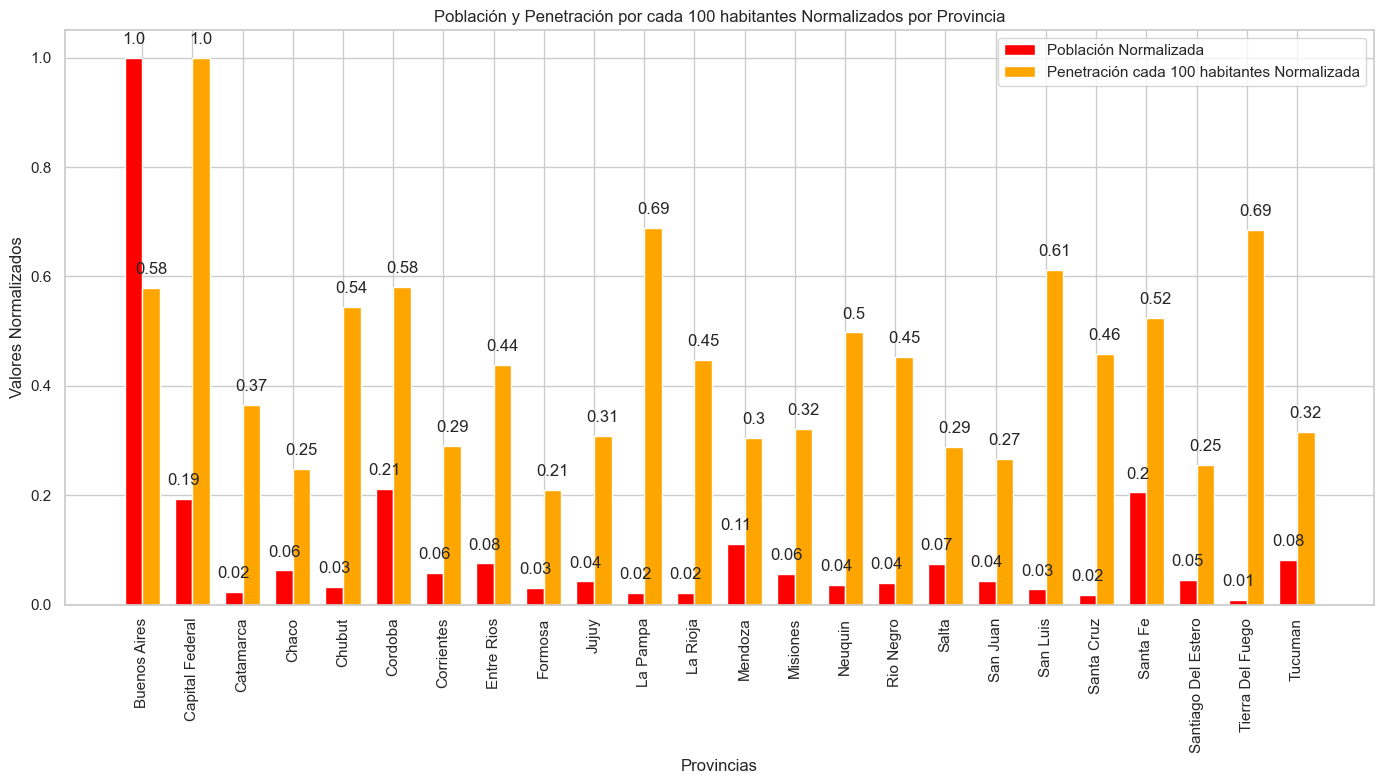

In [66]:
Poblacion['PROVINCIAS'] = Poblacion['PROVINCIAS'].astype(str)
Poblacion['POBLACION_NORM'] = Poblacion['POBLACION'] / Poblacion['POBLACION'].max()
Poblacion['Penetracion_cada_100_hab_NORM'] = Poblacion['Penetracion_cada_100_hab'] / Poblacion['Penetracion_cada_100_hab'].max()

# Crear un gráfico de barras agrupadas para Población y Penetración cada 100 habitantes normalizados
bar_width = 0.35
index = np.arange(len(Poblacion['PROVINCIAS']))

fig, ax = plt.subplots(figsize=(14, 8))

# Barras para Población normalizada
bar1 = ax.bar(index, Poblacion['POBLACION_NORM'], bar_width, label='Población Normalizada', color='red')

# Barras para Penetración cada 100 habitantes normalizada
bar2 = ax.bar(index + bar_width, Poblacion['Penetracion_cada_100_hab_NORM'], bar_width, label='Penetración cada 100 habitantes Normalizada', color='orange')

# Añadir etiquetas y título
ax.set_xlabel('Provincias')
ax.set_ylabel('Valores Normalizados')
ax.set_title('Población y Penetración por cada 100 habitantes Normalizados por Provincia')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(Poblacion['PROVINCIAS'], rotation=90)
ax.legend()

# Mostrar valores sobre las barras
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [67]:
variables = ["POBLACION","ACCESOS","Penetracion_cada_100_hab","Penetracion_cada_100_hogares"]
Matriz_correlacion = Poblacion[variables].corr()

In [68]:
Matriz_correlacion

,POBLACION,ACCESOS,Penetracion_cada_100_hab,Penetracion_cada_100_hogares
POBLACION,1.000000,0.991174,0.242071,0.143801
ACCESOS,0.991174,1.000000,0.350099,0.240551
Penetracion_cada_100_hab,0.242071,0.350099,1.000000,0.958959
Penetracion_cada_100_hogares,0.143801,0.240551,0.958959,1.000000


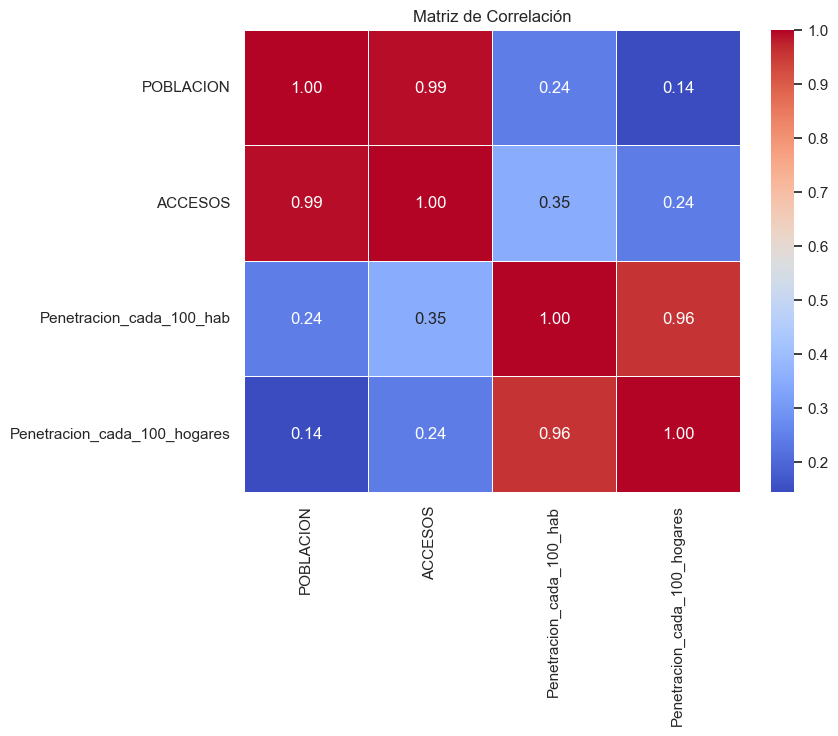

In [69]:
plt.figure(figsize=(8, 6))
sns.heatmap(Matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

- Existe una correlación positiva muy fuerte entre la población y el número de accesos, lo que indica que a medida que aumenta la población, también lo hace el número de accesos.

- Existe una correlación positiva muy fuerte entre la penetración por cada 100 habitantes y la penetración por cada 100 hogares. Esto indica que estas dos variables están altamente relacionadas; a medida que una aumenta, la otra también lo hace casi en la misma proporción.

- Existe una correlación positiva moderada entre el número de accesos y la penetración por cada 100 habitantes. Esto sugiere que a medida que aumentan los accesos, también aumenta la penetración por cada 100 habitantes, pero la relación no es muy fuerte.

-Existe una correlación positiva débil entre el número de accesos y la penetración por cada 100 hogares. Esto indica que el número de accesos tiene un efecto menor sobre la penetración por cada 100 hogares.

- Las correlaciones débiles entre POBLACION con
Penetracion_cada_100_hab y Penetracion_cada_100_hogares sugieren que la población por sí sola no es un predictor fuerte de estas tasas de penetración. Es decir que no porque una provincia tenga un gran numero de habitates puede llegar a tener una alta penetracion de internet tanto en habitantes como en hogares.